할로윈 투자와 MDD 전략 연습 문제
1. 할로윈 투자 전략
설명:
 할로윈 투자 전략은 **"Sell in May and Go Away"**라는 격언에 기반한 전략으로, 매년 5월부터 10월까지 시장에서 벗어나 있다가 11월부터 다시 투자하는 방식을 말합니다.
 이 전략은 역사적으로 11월부터 4월까지 시장이 더 강한 수익률을 보인다는 가설에서 유래했습니다.
연습 문제:
3개 개별 종목 주식 데이터(2000년~2023)에서 할로윈 투자 전략에 따라 11월부터 4월까지의 투자 성과를 계산하세요.(비교 대상 단순 보유 수익률)
데이터에서 **MDD (Maximum Drawdown)**를 구해 이 전략의 최대 손실을 계산해보세요.


In [417]:
import pandas as pd 
import FinanceDataReader as fdr


2. 문제 데이터
문제 1: 할로윈 전략에 따른 누적 수익률 계산
조건: 매년 11월부터 다음 해 4월까지의 수익률 계산.
목표: 전체 투자 기간 동안의 누적 수익률 구하기.

In [418]:
ticker_name_list = [ # 3 개 KO cocacola, AAPL apple , Alaska Air Group, Inc. (ALK)
    'KO',
    'AAPL',
    'ALK'
]

# ticker_name_list = [ 
#     '005930',  # 삼성전자 (전자/반도체)
#     '051910',  # LG화학 (화학/배터리)
#     '035720'   # 카카오 (IT/플랫폼)
# ]

# ticker_name_list = [ 
#     'KS11',  # 삼성전자 (전자/반도체)
#     'S&P500'  # LG화학 (화학/배터리)
# ]

start_date_str = '2016'
end_date_str = '2019'

data_df_list = []
for symbol in ticker_name_list:
    df = fdr.DataReader(symbol, start_date_str, f'{end_date_str}-12')
    data_df_list.append(df)  
    df.info()

data_df_list[1].head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 985 entries, 2016-01-04 to 2019-11-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       985 non-null    float64
 1   High       985 non-null    float64
 2   Low        985 non-null    float64
 3   Close      985 non-null    float64
 4   Volume     985 non-null    int64  
 5   Adj Close  985 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 53.9 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 985 entries, 2016-01-04 to 2019-11-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       985 non-null    float64
 1   High       985 non-null    float64
 2   Low        985 non-null    float64
 3   Close      985 non-null    float64
 4   Volume     985 non-null    int64  
 5   Adj Close  985 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 53.9 KB
<class 'pand

,Open,High,Low,Close,Volume,Adj Close
2016-01-04,25.652500,26.342501,25.500000,26.337500,270597600,23.860584
2016-01-05,26.437500,26.462500,25.602501,25.677500,223164000,23.262644
2016-01-06,25.139999,25.592501,24.967501,25.174999,273829600,22.807409
2016-01-07,24.670000,25.032499,24.107500,24.112499,324377600,21.844833
2016-01-08,24.637501,24.777500,24.190001,24.240000,283192000,21.960340


In [419]:
def calc_func_hw(df : pd.DataFrame):
    cum_rate_of_return = 1
    for year in range(int(start_date_str), int(end_date_str)):
        buy_year_month = f'{year}-11'
        sell_year_month = f'{year+1}-04'
        buy_price = df.loc[buy_year_month].iloc[0].loc['Open']
        sell_price = df.loc[sell_year_month].iloc[-1].loc['Close']

        rate_of_return = sell_price / buy_price
        cum_rate_of_return = cum_rate_of_return * rate_of_return
    return cum_rate_of_return # + 원금 보장형 년 이익을 추가 해 주어야 한다. 


In [420]:
rate_list = []
for df in data_df_list:
    rate_list.append(calc_func_hw(df))
rate_list

[0.9863178701259088, 1.1283740218118983, 1.168358651116151]

In [421]:
simple_rate_list = []
ranges = 23
for df in data_df_list:
    simple_rate_of_return = df.iloc[-1].loc['Close'] / df.loc[f'{start_date_str}-11'].iloc[0].loc['Open']
    simple_cum_rate_of_return = 1 * simple_rate_of_return
    CAGR = ((simple_cum_rate_of_return ** (1/ranges))-1) * 100
    simple_rate_list.append(CAGR)
simple_rate_list


[1.007925590771186, 3.795176377019316, -0.19868248170783476]

문제 2: MDD (Maximum Drawdown) 계산
조건: 데이터 전체 기간에서 MDD를 계산하세요.
목표: 투자 기간 중 최대 손실률을 계산.

In [422]:
for df in data_df_list:
    df['prev_high'] = df['Close'].cummax()
 
data_df_list[0].tail()

,Open,High,Low,Close,Volume,Adj Close,prev_high
2019-11-22,52.959999,53.189999,52.750000,53.029999,9113300,45.079418,55.77
2019-11-25,53.279999,53.389999,52.770000,53.220001,10963500,45.240929,55.77
2019-11-26,53.310001,53.939999,53.220001,53.900002,13219800,45.818989,55.77
2019-11-27,53.930000,54.099998,53.599998,53.950001,9595200,45.861485,55.77
2019-11-29,53.700001,53.730000,53.220001,53.400002,7222300,45.733021,55.77


In [423]:
for df in data_df_list:
    df['DD'] = (1 - (df['Close'] / df['prev_high'])) * 100

data_df_list[0].tail()


,Open,High,Low,Close,Volume,Adj Close,prev_high,DD
2019-11-22,52.959999,53.189999,52.750000,53.029999,9113300,45.079418,55.77,4.913039
2019-11-25,53.279999,53.389999,52.770000,53.220001,10963500,45.240929,55.77,4.572349
2019-11-26,53.310001,53.939999,53.220001,53.900002,13219800,45.818989,55.77,3.353055
2019-11-27,53.930000,54.099998,53.599998,53.950001,9595200,45.861485,55.77,3.263403
2019-11-29,53.700001,53.730000,53.220001,53.400002,7222300,45.733021,55.77,4.249595


In [424]:
MDD_list = []
for df in data_df_list:
    MDD_list.append(df['DD'].max())
MDD_list

[14.382855383903348, 38.72969450862453, 46.52833238587475]

4. 추가 과제
변형 전략:
할로윈 투자 전략을 6개월 주기로 변경해 성과를 비교하세요.
매년 11월4월과 5월10월의 성과 차이를 시각화하세요.
결과 시각화:
가격 변동, 할로윈 기간 수익률, 드로우다운을 한 그래프에 표시하세요.

In [425]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [426]:
def calc_simple_rate_of_return(df):
    diff_date = df.index[-1] - df.loc[f'{start_date_str}-11'].index[0]
    df['Simple_Rate_of_Return'] = df['Close'] / df.loc[f'{start_date_str}-11'].iloc[0].loc['Open']
    simple_cum_rate_of_return = 1 * df['Simple_Rate_of_Return']
    df['CAGR']  = ((simple_cum_rate_of_return ** (1/(diff_date.days/365)))-1) * 100
    return df

In [427]:
def calc_halloween_rate_of_return(df):
    # 결과를 저장할 새로운 컬럼 생성
    df['Halloween_Return'] = float('nan')  # 모든 값을 우선 NaN으로 초기화
    
    cum_rate_of_return = 1
    start_year = df.index[0].year
    end_year = df.index[-1].year
    
    for year in range(start_year, end_year):
        # 매수 시점 (11월)
        buy_date = f'{year}-11'
        # 매도 시점 (다음해 4월)
        sell_date = f'{year+1}-04'
        
        try:
            # 해당 기간의 시작 가격
            buy_price = df.loc[buy_date].iloc[0]['Open']
            
            # 11월부터 다음해 4월까지의 기간 선택
            mask = (df.index >= buy_date) & (df.index <= f'{year+1}-04-30')
            
            # 해당 기간 동안의 일별 수익률 계산
            df.loc[mask, 'Halloween_Return'] = (df.loc[mask, 'Close'] / buy_price) * cum_rate_of_return
            
            # 매도 시점의 가격으로 누적 수익률 업데이트
            sell_price = df.loc[sell_date].iloc[-1]['Close']
            cum_rate_of_return *= (sell_price / buy_price)
            
        except KeyError:
            continue
    
    # CAGR 계산
    diff_date = df.index[-1] - df.index[0]
    df['Halloween_CAGR'] = ((df['Halloween_Return'] ** (1/(diff_date.days/365)))-1) * 100
    
    return df

In [428]:
def calc_reverse_halloween_rate_of_return(df):
    df['reverse_Return'] = float('nan') # 기본값을 1로 설정 (수익률 중립)
    
    cum_rate_of_return = 1
    start_year = df.index[0].year
    end_year = df.index[-1].year
    
    for year in range(start_year, end_year):
        try:
            # 매수 시점 (5월)
            buy_date = f'{year}-05'
            # 매도 시점 (10월)
            sell_date = f'{year}-10'
            
            # 해당 기간의 시작 가격
            buy_price = df.loc[buy_date].iloc[0]['Close']
            
            # 5월부터 10월까지의 기간 선택
            summer_mask = (df.index >= buy_date) & (df.index <= f'{year}-10-31')
            
            # 11월부터 다음해 4월까지는 현금 보유 기간
            winter_mask = (df.index >= f'{year}-11-01') & (df.index < f'{year+1}-05')
            
            # 여름 기간 동안의 일별 수익률 계산
            df.loc[summer_mask, 'reverse_Return'] = (df.loc[summer_mask, 'Close'] / buy_price) * cum_rate_of_return
            
            # 매도 시점의 가격으로 누적 수익률 업데이트
            sell_price = df.loc[sell_date].iloc[-1]['Close']
            period_return = sell_price / buy_price
            
            # # 겨울 기간은 직전 수익률 유지
            # if year < end_year - 1:  # 마지막 해가 아닌 경우만
            #     df.loc[winter_mask, 'reverse_Return'] = cum_rate_of_return * period_return
            
            cum_rate_of_return *= period_return
            
        except KeyError:
            continue
    
    # CAGR 계산
    diff_date = df.index[-1] - df.index[0]
    df['reverse_CAGR'] = ((df['reverse_Return'] ** (1/(diff_date.days/365)))-1) * 100
    
    return df

In [429]:
for df in data_df_list:
    df = calc_simple_rate_of_return(df)
data_df_list[0].head()

,Open,High,Low,Close,Volume,Adj Close,prev_high,DD,Simple_Rate_of_Return,CAGR
2016-01-04,42.340000,42.500000,41.970001,42.400002,16084100,31.878269,42.400002,0.000000,1.000000,0.000000
2016-01-05,42.310001,42.630001,42.169998,42.549999,15781900,31.991039,42.549999,0.000000,1.003538,0.114846
2016-01-06,42.200001,42.509998,42.040001,42.320000,16245100,31.818121,42.549999,0.540539,0.998113,-0.061365
2016-01-07,41.650002,42.110001,41.450001,41.619999,20563600,31.291840,42.549999,2.185665,0.981604,-0.601671
2016-01-08,41.650002,42.119999,41.410000,41.509998,14645900,31.209124,42.549999,2.444186,0.979009,-0.687133


In [430]:
for df in data_df_list:
    df = calc_halloween_rate_of_return(df)
data_df_list[0].head()

,Open,High,Low,Close,Volume,Adj Close,prev_high,DD,Simple_Rate_of_Return,CAGR,Halloween_Return,Halloween_CAGR
2016-01-04,42.340000,42.500000,41.970001,42.400002,16084100,31.878269,42.400002,0.000000,1.000000,0.000000,NaN,NaN
2016-01-05,42.310001,42.630001,42.169998,42.549999,15781900,31.991039,42.549999,0.000000,1.003538,0.114846,NaN,NaN
2016-01-06,42.200001,42.509998,42.040001,42.320000,16245100,31.818121,42.549999,0.540539,0.998113,-0.061365,NaN,NaN
2016-01-07,41.650002,42.110001,41.450001,41.619999,20563600,31.291840,42.549999,2.185665,0.981604,-0.601671,NaN,NaN
2016-01-08,41.650002,42.119999,41.410000,41.509998,14645900,31.209124,42.549999,2.444186,0.979009,-0.687133,NaN,NaN


In [431]:
for df in data_df_list:
    df = calc_reverse_halloween_rate_of_return(df)
data_df_list[0].head()

,Open,High,Low,Close,Volume,Adj Close,prev_high,DD,Simple_Rate_of_Return,CAGR,Halloween_Return,Halloween_CAGR,reverse_Return,reverse_CAGR
2016-01-04,42.340000,42.500000,41.970001,42.400002,16084100,31.878269,42.400002,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN
2016-01-05,42.310001,42.630001,42.169998,42.549999,15781900,31.991039,42.549999,0.000000,1.003538,0.114846,NaN,NaN,NaN,NaN
2016-01-06,42.200001,42.509998,42.040001,42.320000,16245100,31.818121,42.549999,0.540539,0.998113,-0.061365,NaN,NaN,NaN,NaN
2016-01-07,41.650002,42.110001,41.450001,41.619999,20563600,31.291840,42.549999,2.185665,0.981604,-0.601671,NaN,NaN,NaN,NaN
2016-01-08,41.650002,42.119999,41.410000,41.509998,14645900,31.209124,42.549999,2.444186,0.979009,-0.687133,NaN,NaN,NaN,NaN


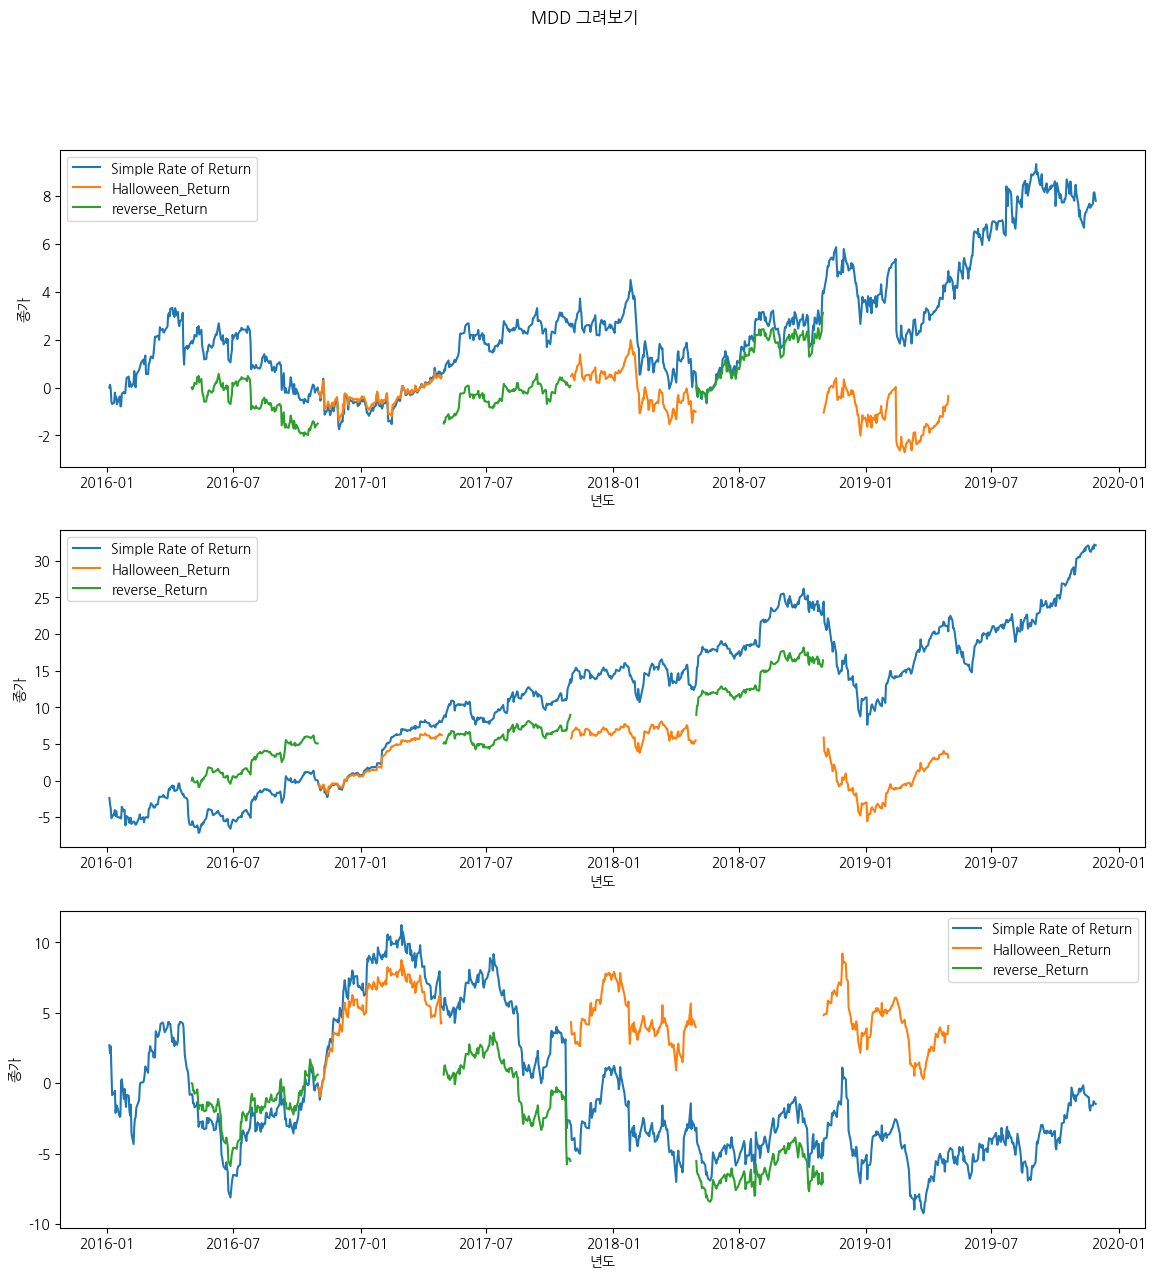

In [432]:

fig, axes = plt.subplots(len(data_df_list),1,figsize=(14,14), dpi=100) # 외곽 사이즈

fig.suptitle('MDD 그려보기')

for idx, df in enumerate(data_df_list):
    # 종가
    # axes[idx].plot(df.index, df['Close'], label='Close' )
    # axes[idx].fill_between(df.index, df['DD']*-1, label='DD',alpha=0.1, color='red' )
    axes[idx].plot(df.index, df['CAGR'], label='Simple Rate of Return' )
    axes[idx].plot(df.index, df['Halloween_CAGR'], label='Halloween_Return' )    
    axes[idx].plot(df.index, df['reverse_CAGR'], label='reverse_Return' )    
    # axes[idx].plot(df.index, df['Simple_Rate_of_Return'], label='Simple Rate of Return' )
    # axes[idx].plot(df.index, df['Halloween_Return'], label='Halloween_Return' )
    axes[idx].set_xlabel('년도')
    axes[idx].set_ylabel('종가')
    axes[idx].legend()

# plt.tight_layout()
plt.show()